# 専修大学経済学部「統計学1」レジュメ，1次元のデ一タ

実証例などで使用する Asai, Kambayashi, Yamaguchi（2015）データ：`childcare`

- Asai, Kambayashi, Yamaguchi（2015), “Childcare availability, household structure, and maternal employment,” *Journal of the Japanese and International Economies*.

**データの変数名定義**

`pref`: 都道府県 (prefecture)

`year`: 年 (year)

`emp.rate`: 母親就業率 (maternal employment rate)

`cap.rate`: 保育所定員率 (capacity/child-population)

`age`: 母親平均年齢 (mothers' average age)

`age.hus`: 父親平均年齢 (fathers' average age)

`emp.rate.hus`: 父親就業率 (paternal employment rate)

`urate`: 失業率 (local unemployment rate)

`nuc.rate`: 核家族世帯率 (fraction of nuclear households)

`numhh`: 世帯数 (number of households)

`hh.type`: 世帯の種類 type of household ("all" = all types, "nuc" = nuclear, "3ge" = 3-generation)

In [1]:
# R環境内に存在するすべてのオブジェクトを削除します。
# これにより、作業空間がクリアされ、新たな分析を始める際に他のオブジェクトによる干渉を避けることができます。
rm(list = ls())

# パッケージの読み込みとデータ読み込み
library(tidyverse)
url <- "https://raw.githubusercontent.com/JeC2017/public_data/main/childcare.csv"
childcare <- read.csv(url, header=TRUE)

# データの最初の数行を表示
head(childcare)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


,pref,year,emp.rate,cap.rate,age,age.hus,emp.rate.hus,urate,nuc.rate,numhh,hh.type
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,北海道,1990,0.2701991,0.1875791,31.64818,34.17721,0.9895076,0.03622666,0.8240965,250086,all
2,青森県,1990,0.4507844,0.3631905,31.40027,34.24343,0.9820385,0.04486930,0.5649628,68647,all
3,岩手県,1990,0.5267243,0.2618665,31.54298,34.25208,0.9900675,0.02627886,0.4966100,63126,all
4,宮城県,1990,0.4206343,0.1327991,31.50385,34.19711,0.9902523,0.02730289,0.5790675,107307,all
5,秋田県,1990,0.5473229,0.2682563,31.46496,34.20592,0.9918102,0.02717173,0.4144711,51772,all
6,山形県,1990,0.6777410,0.2228247,31.45862,34.23097,0.9949089,0.01745351,0.3202995,57159,all


In [2]:
# 下記の行では、childcare というデータフレームから、
# year 列が 1990 であり、かつ hh.type 列が "all" であるサブセットを抽出しています。
# この処理は tidyverse パッケージのパイプ演算子 (%>%) を用いて行われており、
# 条件に一致するデータのみを新たなデータフレーム
# childcare_hh_all_1990 に保存しています。

childcare_hh_all_1990 <- childcare %>%
  subset(subset = (year == 1990) & (hh.type == "all"))

# 次は、str() 関数を使用して、
# 新しく作成されたデータフレーム childcare_hh_all_1990 の構造を表示します。
# この関数はデータフレームの列名、列のタイプ、
# および先頭のいくつかのデータを表示することにより、データの概要を提供します。
# これにより、データの型や含まれる主要な情報、列の概略を把握することができます。

str(childcare_hh_all_1990)

'data.frame':	47 obs. of  11 variables:
 $ pref        : chr  "北海道" "青森県" "岩手県" "宮城県" ...
 $ year        : int  1990 1990 1990 1990 1990 1990 1990 1990 1990 1990 ...
 $ emp.rate    : num  0.27 0.451 0.527 0.421 0.547 ...
 $ cap.rate    : num  0.188 0.363 0.262 0.133 0.268 ...
 $ age         : num  31.6 31.4 31.5 31.5 31.5 ...
 $ age.hus     : num  34.2 34.2 34.3 34.2 34.2 ...
 $ emp.rate.hus: num  0.99 0.982 0.99 0.99 0.992 ...
 $ urate       : num  0.0362 0.0449 0.0263 0.0273 0.0272 ...
 $ nuc.rate    : num  0.824 0.565 0.497 0.579 0.414 ...
 $ numhh       : int  250086 68647 63126 107307 51772 57159 101753 134651 92983 89503 ...
 $ hh.type     : chr  "all" "all" "all" "all" ...


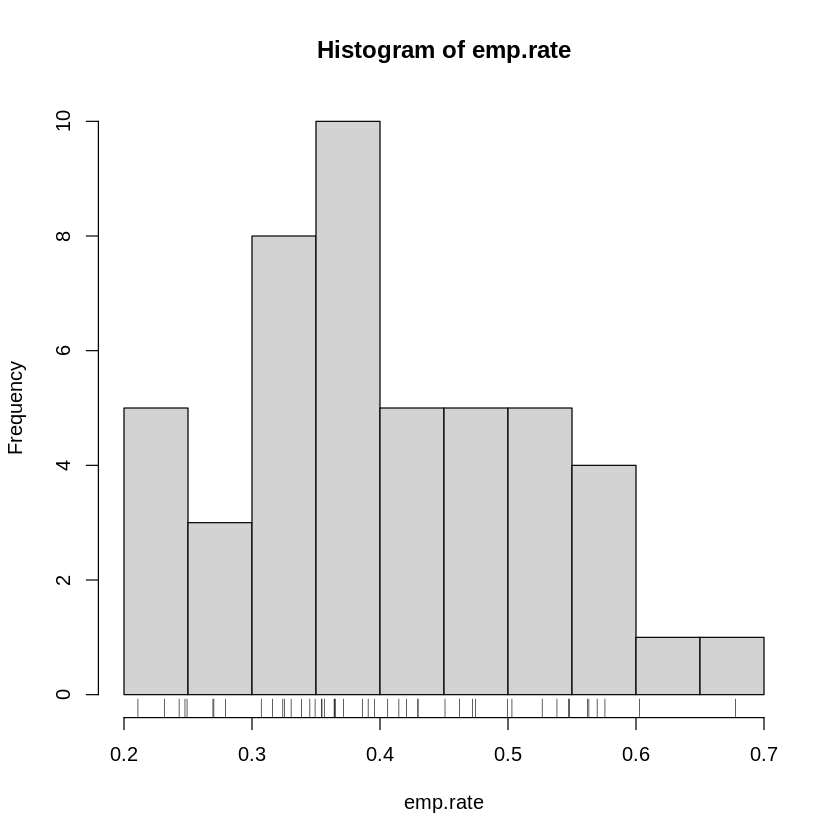

In [3]:
# 以下は、Rプログラムの各行が実行している処理について、説明します。

emp.rate <- childcare_hh_all_1990$emp.rate

# childcare_hh_all_1990 というデータフレームから emp.rate という列を抽出し、
# 新たなベクトル変数 emp.rate に代入しています。
# これにより、emp.rate 列のデータを単独で操作や分析が容易になります。

hist(emp.rate)

# 先に抽出した emp.rate データのヒストグラムを作成します。
# hist() 関数はデータの分布を視覚化するのに使われ、
# 自動的に適切なビン数でデータをビンに分け、
# その頻度に基づいたヒストグラムを表示します。

rug(emp.rate)

# rug() 関数はヒストグラムまたは他のプロットの下部に「ラグプロット」を追加します。
# これは、データポイントの実際の位置を小さな線（タッセル）で示すもので、
# データの分布密度を直感的に理解するのに役立ちます。
# emp.rate の各データポイントがどのように分布しているかを細かく示すことができます。

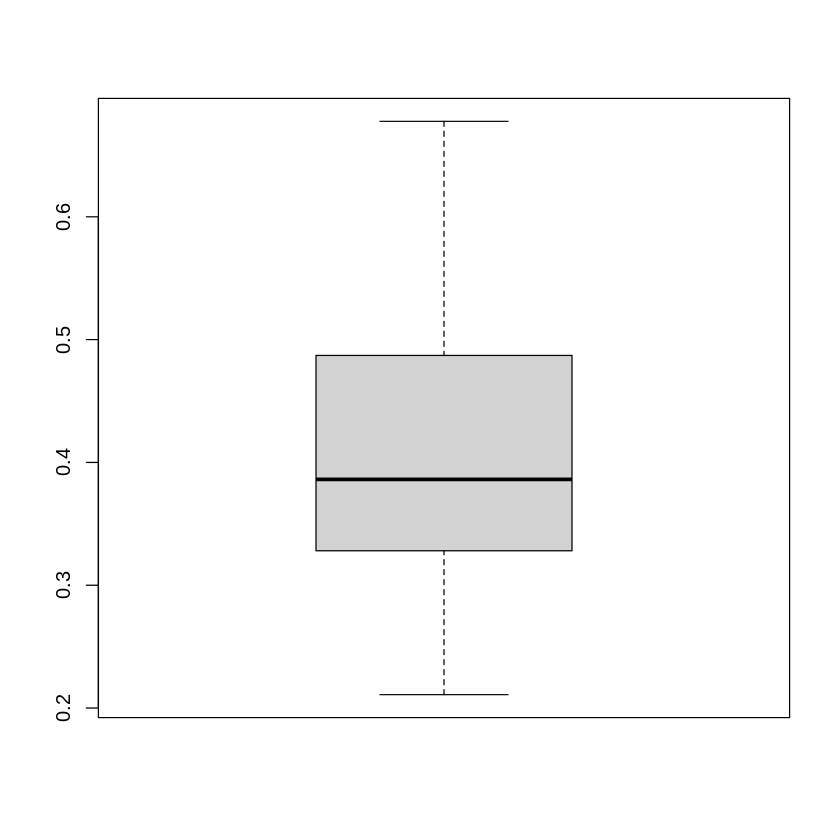

In [4]:
# ボックスプロットを作成し、データの四分位数、中央値、外れ値を表示します。
boxplot(emp.rate)

In [8]:
# pastecs パッケージの stat.desc() 関数を使うとさらに多くの統計量の計算が可能です。
# pastecs::stat.desc()

# pastecs パッケージのインストール
# install.packages("pastecs")

# pastecs パッケージを読み込む
library(pastecs)

# どのような統計量を計算するかを引数で変更することができます。
# basic : 欠損値の数や最小値最大値など
# desc : 平均値やその標準偏差(SE.mean)や95%信頼区間(CI.mean.0.95)など
# norm : 正規分布の統計量（歪度や尖度）と正規性の検定
# p: 信頼区間の計算に使う確率水準

result <- stat.desc(emp.rate, basic = T, desc = T, norm = T, p = 0.95 )
print(result, digits=3)

     nbr.val     nbr.null       nbr.na          min          max        range 
     47.0000       0.0000       0.0000       0.2109       0.6777       0.4669 
         sum       median         mean      SE.mean CI.mean.0.95          var 
     19.0157       0.3862       0.4046       0.0164       0.0331       0.0127 
     std.dev     coef.var     skewness     skew.2SE     kurtosis     kurt.2SE 
      0.1127       0.2785       0.3416       0.4929      -0.7583      -0.5569 
  normtest.W   normtest.p 
      0.9685       0.2326 
